In [1]:
import pandas as pd
import requests
from xml.etree import ElementTree
import numpy as np

In [2]:
url = "http://webservices.commuterpage.com/counters.cfc?wsdl&method=GetCountInDateRange&counterid=4&startDate=10/01/2009&endDate=04/01/2017&direction=&mode=B&interval=d"
xmlfile = open('xml_bikeometer.xml', 'w')
xmldata = requests.get(url)
xmlfile.write(xmldata.text)
xmlfile.close()

xml_data = 'xml_bikeometer.xml'

In [3]:
document = ElementTree.parse(xml_data)
date = []
count = []
direction = []
for day in document.findall('count'):
    date.append(day.attrib['date'])
    count.append(day.attrib['count'])
    direction.append(day.attrib['direction'])
dfbikes = pd.DataFrame({'date' : date, 'count': count, 'direction': direction}, dtype = int)
dfbikes['date'] = pd.to_datetime(dfbikes.date)
dfbikes = dfbikes.groupby('date').sum()
dfbikes.head()

,count
date,
2009-10-16,291
2009-10-17,80
2009-10-18,213
2009-10-19,1012
2009-10-20,1251


In [4]:
dfbikes.dtypes

count    int32
dtype: object

In [6]:
weather = pd.read_csv('weather09t17.csv', usecols=['REPORTTPYE','DATE', 'DAILYMaximumDryBulbTemp','DAILYAverageRelativeHumidity',
                                        'DAILYAverageWindSpeed', 'DAILYPrecip', 'DAILYSnowfall', 'DAILYSnowDepth'])

daily_weather = weather.loc[weather['REPORTTPYE'] == 'SOD', :]
daily_weather['date'] = pd.to_datetime(daily_weather.DATE, format='%Y-%m-%d').dt.date
daily_weather = daily_weather.set_index('date')
snow_weather = daily_weather[['DAILYSnowfall', 'DAILYSnowDepth']]
snow_weather

C:\Users\George\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (40) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\George\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,DAILYSnowfall,DAILYSnowDepth
date,,
2009-10-01,0.0,0
2009-10-02,0.0,0
2009-10-03,0.0,0
2009-10-04,0.0,0
2009-10-05,0.0,0
2009-10-06,0.0,0
2009-10-07,0.0,0
2009-10-08,0.0,0
2009-10-09,0.0,0


In [7]:
df_wu = pd.read_csv('weather_kdca0917.csv', index_col='date', parse_dates=True)
df_wu.dtypes

CloudCover                     int64
Max Dew PointF                 int64
Max Gust SpeedMPH            float64
Max Humidity                   int64
Max Sea Level PressureIn     float64
Max TemperatureF               int64
Max VisibilityMiles            int64
Max Wind SpeedMPH              int64
Mean Humidity                  int64
Mean Sea Level PressureIn    float64
Mean TemperatureF              int64
Mean VisibilityMiles           int64
Mean Wind SpeedMPH             int64
MeanDew PointF                 int64
Min DewpointF                  int64
Min Humidity                   int64
Min Sea Level PressureIn     float64
Min TemperatureF               int64
Min VisibilityMiles            int64
PrecipitationIn              float64
WindDirDegrees                 int64
Snow                           int64
Fog                            int64
dtype: object

In [8]:
dfsunrise = pd.read_pickle('sunrise120120102017.pkl')

In [9]:
bikedataframe = pd.concat([dfbikes, snow_weather, df_wu, dfsunrise], axis=1)

#bikedataframe = bikedataframe.drop(['DATE', 'REPORTTPYE'], axis=1)
bikedataframe.head()

,count,DAILYSnowfall,DAILYSnowDepth,CloudCover,Max Dew PointF,Max Gust SpeedMPH,Max Humidity,Max Sea Level PressureIn,Max TemperatureF,Max VisibilityMiles,...,WindDirDegrees,Snow,Fog,month,day,year,sunrise,sunset,sunrise_int,sunset_int
2009-01-01,NaN,NaN,NaN,2.0,14.0,31.0,53.0,30.42,34.0,10.0,...,284.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2009-01-02,NaN,NaN,NaN,6.0,29.0,24.0,70.0,30.18,43.0,10.0,...,198.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2009-01-03,NaN,NaN,NaN,1.0,29.0,21.0,75.0,30.20,47.0,10.0,...,349.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2009-01-04,NaN,NaN,NaN,6.0,31.0,12.0,78.0,30.22,45.0,10.0,...,182.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2009-01-05,NaN,NaN,NaN,8.0,37.0,22.0,92.0,30.08,51.0,10.0,...,341.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
bikedataframe = bikedataframe.drop(['sunrise', 'sunset'], 1)
bikedataframe = bikedataframe.replace(to_replace='T', value=0.01)
bikedataframe = bikedataframe.astype(float)
bikedataframe["dayofweek"] = bikedataframe.index.dayofweek
bikedataframe["weekday"] = 0
bikedataframe['weekday'] = np.where(bikedataframe['dayofweek'] < 5, 1, 0)
bikedataframe['sunsethour'] = (bikedataframe['sunset_int'] // 100) + ((bikedataframe['sunset_int'] % 100) / 60)
bikedataframe['sunrisehour'] = (bikedataframe['sunrise_int'] // 100) + ((bikedataframe['sunrise_int'] % 100) / 60)
bikedataframe['day_hrs'] = bikedataframe['sunsethour'] - bikedataframe['sunrisehour']
bikedataframe['year'] = bikedataframe['year'] - 2000
bikedataframe.head(10)

,count,DAILYSnowfall,DAILYSnowDepth,CloudCover,Max Dew PointF,Max Gust SpeedMPH,Max Humidity,Max Sea Level PressureIn,Max TemperatureF,Max VisibilityMiles,...,month,day,year,sunrise_int,sunset_int,dayofweek,weekday,sunsethour,sunrisehour,day_hrs
2009-01-01,NaN,NaN,NaN,2.0,14.0,31.0,53.0,30.42,34.0,10.0,...,NaN,NaN,NaN,NaN,NaN,3,1,NaN,NaN,NaN
2009-01-02,NaN,NaN,NaN,6.0,29.0,24.0,70.0,30.18,43.0,10.0,...,NaN,NaN,NaN,NaN,NaN,4,1,NaN,NaN,NaN
2009-01-03,NaN,NaN,NaN,1.0,29.0,21.0,75.0,30.20,47.0,10.0,...,NaN,NaN,NaN,NaN,NaN,5,0,NaN,NaN,NaN
2009-01-04,NaN,NaN,NaN,6.0,31.0,12.0,78.0,30.22,45.0,10.0,...,NaN,NaN,NaN,NaN,NaN,6,0,NaN,NaN,NaN
2009-01-05,NaN,NaN,NaN,8.0,37.0,22.0,92.0,30.08,51.0,10.0,...,NaN,NaN,NaN,NaN,NaN,0,1,NaN,NaN,NaN
2009-01-06,NaN,NaN,NaN,8.0,32.0,15.0,89.0,30.06,41.0,10.0,...,NaN,NaN,NaN,NaN,NaN,1,1,NaN,NaN,NaN
2009-01-07,NaN,NaN,NaN,8.0,39.0,22.0,100.0,29.68,42.0,10.0,...,NaN,NaN,NaN,NaN,NaN,2,1,NaN,NaN,NaN
2009-01-08,NaN,NaN,NaN,4.0,28.0,37.0,82.0,29.91,42.0,10.0,...,NaN,NaN,NaN,NaN,NaN,3,1,NaN,NaN,NaN
2009-01-09,NaN,NaN,NaN,3.0,19.0,28.0,57.0,30.28,39.0,10.0,...,NaN,NaN,NaN,NaN,NaN,4,1,NaN,NaN,NaN
2009-01-10,NaN,NaN,NaN,7.0,34.0,16.0,92.0,30.28,40.0,10.0,...,NaN,NaN,NaN,NaN,NaN,5,0,NaN,NaN,NaN


In [11]:
bikedataframe.dtypes

count                        float64
DAILYSnowfall                float64
DAILYSnowDepth               float64
CloudCover                   float64
Max Dew PointF               float64
Max Gust SpeedMPH            float64
Max Humidity                 float64
Max Sea Level PressureIn     float64
Max TemperatureF             float64
Max VisibilityMiles          float64
Max Wind SpeedMPH            float64
Mean Humidity                float64
Mean Sea Level PressureIn    float64
Mean TemperatureF            float64
Mean VisibilityMiles         float64
Mean Wind SpeedMPH           float64
MeanDew PointF               float64
Min DewpointF                float64
Min Humidity                 float64
Min Sea Level PressureIn     float64
Min TemperatureF             float64
Min VisibilityMiles          float64
PrecipitationIn              float64
WindDirDegrees               float64
Snow                         float64
Fog                          float64
month                        float64
d

In [12]:
from pandas.tseries.holiday import USFederalHolidayCalendar
cal = USFederalHolidayCalendar()
holidays = cal.holidays('2009', '2017')
bikedataframe = bikedataframe.join(pd.Series(1, index=holidays, name='holiday'))
bikedataframe['holiday'].fillna(0, inplace=True)

In [13]:
holidays

DatetimeIndex(['2009-01-01', '2009-01-19', '2009-02-16', '2009-05-25',
               '2009-07-03', '2009-09-07', '2009-10-12', '2009-11-11',
               '2009-11-26', '2009-12-25', '2010-01-01', '2010-01-18',
               '2010-02-15', '2010-05-31', '2010-07-05', '2010-09-06',
               '2010-10-11', '2010-11-11', '2010-11-25', '2010-12-24',
               '2010-12-31', '2011-01-17', '2011-02-21', '2011-05-30',
               '2011-07-04', '2011-09-05', '2011-10-10', '2011-11-11',
               '2011-11-24', '2011-12-26', '2012-01-02', '2012-01-16',
               '2012-02-20', '2012-05-28', '2012-07-04', '2012-09-03',
               '2012-10-08', '2012-11-12', '2012-11-22', '2012-12-25',
               '2013-01-01', '2013-01-21', '2013-02-18', '2013-05-27',
               '2013-07-04', '2013-09-02', '2013-10-14', '2013-11-11',
               '2013-11-28', '2013-12-25', '2014-01-01', '2014-01-20',
               '2014-02-17', '2014-05-26', '2014-07-04', '2014-09-01',
      

In [14]:
bikedataframe[-350 :]

,count,DAILYSnowfall,DAILYSnowDepth,CloudCover,Max Dew PointF,Max Gust SpeedMPH,Max Humidity,Max Sea Level PressureIn,Max TemperatureF,Max VisibilityMiles,...,day,year,sunrise_int,sunset_int,dayofweek,weekday,sunsethour,sunrisehour,day_hrs,holiday
2017-01-16,417.0,0.00,0.0,8.0,38.0,14.0,70.0,30.49,46.0,10.0,...,16.0,17.0,725.0,1712.0,0,1,17.200000,7.416667,9.783333,0.0
2017-01-17,756.0,0.00,0.0,7.0,52.0,17.0,100.0,30.28,53.0,10.0,...,17.0,17.0,724.0,1713.0,1,1,17.216667,7.400000,9.816667,0.0
2017-01-18,1300.0,0.00,0.0,6.0,47.0,31.0,100.0,30.10,60.0,10.0,...,18.0,17.0,724.0,1714.0,2,1,17.233333,7.400000,9.833333,0.0
2017-01-19,1052.0,0.00,0.0,6.0,39.0,16.0,93.0,30.12,53.0,10.0,...,19.0,17.0,724.0,1715.0,3,1,17.250000,7.400000,9.850000,0.0
2017-01-20,468.0,0.00,0.0,8.0,47.0,14.0,100.0,30.02,49.0,10.0,...,20.0,17.0,723.0,1716.0,4,1,17.266667,7.383333,9.883333,0.0
2017-01-21,1033.0,0.00,0.0,8.0,49.0,12.0,100.0,29.94,50.0,10.0,...,21.0,17.0,722.0,1718.0,5,0,17.300000,7.366667,9.933333,0.0
2017-01-22,236.0,0.00,0.0,8.0,51.0,18.0,100.0,29.76,52.0,10.0,...,22.0,17.0,722.0,1719.0,6,0,17.316667,7.366667,9.950000,0.0
2017-01-23,337.0,0.00,0.0,8.0,49.0,47.0,100.0,29.61,50.0,10.0,...,23.0,17.0,721.0,1720.0,0,1,17.333333,7.350000,9.983333,0.0
2017-01-24,922.0,0.00,0.0,7.0,38.0,37.0,92.0,29.67,49.0,10.0,...,24.0,17.0,721.0,1721.0,1,1,17.350000,7.350000,10.000000,0.0
2017-01-25,1497.0,0.00,0.0,1.0,40.0,33.0,71.0,29.80,61.0,10.0,...,25.0,17.0,720.0,1722.0,2,1,17.366667,7.333333,10.033333,0.0


In [15]:
bikedataframe.dropna(axis=0, how='any', thresh=None, subset=None, inplace=True)

In [16]:
bikedataframe

,count,DAILYSnowfall,DAILYSnowDepth,CloudCover,Max Dew PointF,Max Gust SpeedMPH,Max Humidity,Max Sea Level PressureIn,Max TemperatureF,Max VisibilityMiles,...,day,year,sunrise_int,sunset_int,dayofweek,weekday,sunsethour,sunrisehour,day_hrs,holiday
2009-10-16,291.0,0.00,0.00,8.0,41.0,23.0,89.0,29.98,45.0,10.0,...,16.0,9.0,719.0,1828.0,4,1,18.466667,7.316667,11.150000,0.0
2009-10-17,80.0,0.00,0.00,8.0,44.0,25.0,93.0,30.05,47.0,10.0,...,17.0,9.0,720.0,1827.0,5,0,18.450000,7.333333,11.116667,0.0
2009-10-18,213.0,0.00,0.00,7.0,40.0,28.0,86.0,30.19,53.0,10.0,...,18.0,9.0,721.0,1825.0,6,0,18.416667,7.350000,11.066667,0.0
2009-10-19,1012.0,0.00,0.00,0.0,40.0,25.0,83.0,30.30,59.0,10.0,...,19.0,9.0,722.0,1824.0,0,1,18.400000,7.366667,11.033333,0.0
2009-10-20,1251.0,0.00,0.00,3.0,49.0,13.0,83.0,30.27,70.0,10.0,...,20.0,9.0,723.0,1823.0,1,1,18.383333,7.383333,11.000000,0.0
2009-10-21,1337.0,0.00,0.00,2.0,51.0,13.0,86.0,30.26,75.0,10.0,...,21.0,9.0,724.0,1821.0,2,1,18.350000,7.400000,10.950000,0.0
2009-10-22,1336.0,0.00,0.00,7.0,52.0,13.0,89.0,30.12,73.0,10.0,...,22.0,9.0,725.0,1820.0,3,1,18.333333,7.416667,10.916667,0.0
2009-10-23,801.0,0.00,0.00,8.0,60.0,22.0,93.0,30.05,67.0,10.0,...,23.0,9.0,726.0,1819.0,4,1,18.316667,7.433333,10.883333,0.0
2009-10-24,181.0,0.00,0.00,8.0,67.0,32.0,87.0,29.84,72.0,10.0,...,24.0,9.0,727.0,1817.0,5,0,18.283333,7.450000,10.833333,0.0
2009-10-25,995.0,0.00,0.00,4.0,45.0,30.0,80.0,30.23,63.0,10.0,...,25.0,9.0,728.0,1816.0,6,0,18.266667,7.466667,10.800000,0.0


In [17]:
bikedataframe = bikedataframe.loc[bikedataframe['count'] > 0]
bikedataframe.shape

(2561, 37)

In [18]:
bikedataframe.dtypes

count                        float64
DAILYSnowfall                float64
DAILYSnowDepth               float64
CloudCover                   float64
Max Dew PointF               float64
Max Gust SpeedMPH            float64
Max Humidity                 float64
Max Sea Level PressureIn     float64
Max TemperatureF             float64
Max VisibilityMiles          float64
Max Wind SpeedMPH            float64
Mean Humidity                float64
Mean Sea Level PressureIn    float64
Mean TemperatureF            float64
Mean VisibilityMiles         float64
Mean Wind SpeedMPH           float64
MeanDew PointF               float64
Min DewpointF                float64
Min Humidity                 float64
Min Sea Level PressureIn     float64
Min TemperatureF             float64
Min VisibilityMiles          float64
PrecipitationIn              float64
WindDirDegrees               float64
Snow                         float64
Fog                          float64
month                        float64
d

In [19]:
#bikedataframe['temp-squared'] = bikedataframe['temperature'].apply(np.square)
#bikedataframe['temp-humid'] = bikedataframe['temperature'] * bikedataframe['humidity']
#bikedataframe['temp-wind'] = bikedataframe['temperature'] * bikedataframe['windspeed']
bikedataframe['snowtotal'] = np.where(bikedataframe['DAILYSnowfall'] > bikedataframe['DAILYSnowDepth'],
                                      bikedataframe['DAILYSnowfall'], bikedataframe['DAILYSnowDepth'])

names = ['Max TemperatureF', 'Min TemperatureF', 'Max Humidity', 'Max Wind SpeedMPH', 'PrecipitationIn', 'weekday', 'holiday', 'day_hrs',
         'snowtotal', 'Fog', 'year', 'sunsethour', 'CloudCover']
X = bikedataframe[names]

C:\Users\George\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [20]:
X.shape

(2561, 13)

In [21]:
y = bikedataframe['count']

In [22]:
from tpot import TPOTRegressor
from sklearn.model_selection import train_test_split

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    train_size=0.75, test_size=0.25, random_state=1)


In [24]:
tpot = TPOTRegressor(generations=5, verbosity=2)
tpot.fit(X_train, y_train)
print(tpot.score(X_test, y_test))
tpot.export('bikeometer_pipeline_custis4boost.py')

Generation 1 - Current best internal CV score: 47633.80676673124


Generation 2 - Current best internal CV score: 47633.80676673124


Generation 3 - Current best internal CV score: 47092.23766798692


Generation 4 - Current best internal CV score: 47092.23766798692


Generation 5 - Current best internal CV score: 46708.91632141071



Best pipeline: GradientBoostingRegressor(input_matrix, GradientBoostingRegressor__alpha=0.85, GradientBoostingRegressor__learning_rate=0.1, GradientBoostingRegressor__loss=ls, GradientBoostingRegressor__max_depth=6, GradientBoostingRegressor__max_features=0.75, GradientBoostingRegressor__min_samples_leaf=6, GradientBoostingRegressor__min_samples_split=16, GradientBoostingRegressor__subsample=1.0)
49196.7593261


In [24]:
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor, VotingClassifier
from sklearn.pipeline import make_pipeline, make_union
from sklearn.preprocessing import FunctionTransformer, StandardScaler, MaxAbsScaler

exported_pipeline = make_pipeline(
    MaxAbsScaler(),
    GradientBoostingRegressor(alpha=0.9, loss="ls", max_depth=5, max_features=0.4, min_samples_leaf=15, min_samples_split=7, subsample=0.8500000000000001)
)
exported_pipeline.fit(X_train, y_train)
results = exported_pipeline.predict(X_test)

In [25]:
from sklearn.metrics import r2_score, mean_squared_error, explained_variance_score
print('R^2 test: %.3f' % (r2_score(y_test, results)))
print(mean_squared_error(y_test, results))
print(explained_variance_score(y_test, results))

R^2 test: 0.868
47995.3262315
0.867799242257


In [26]:
y_predit = exported_pipeline.predict(X)

In [27]:
print('R^2 train: %.3f' % (r2_score(y, y_predit)))

R^2 train: 0.913


In [28]:
exported_pipeline.named_steps['gradientboostingregressor'].feature_importances_

array([ 0.14636622,  0.13596804,  0.05815438,  0.07299043,  0.07983575,
        0.05540681,  0.01909238,  0.14319976,  0.01107447,  0.00470918,
        0.08904099,  0.12949774,  0.05466387])

In [29]:
feature_importance = exported_pipeline.named_steps['gradientboostingregressor'].feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
print(feature_importance)

[ 100.           92.89577492   39.73210381   49.86835659   54.54520329
   37.85491708   13.04425059   97.83661423    7.56627466    3.21739304
   60.83438197   88.47515092   37.34732615]


C:\Users\George\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


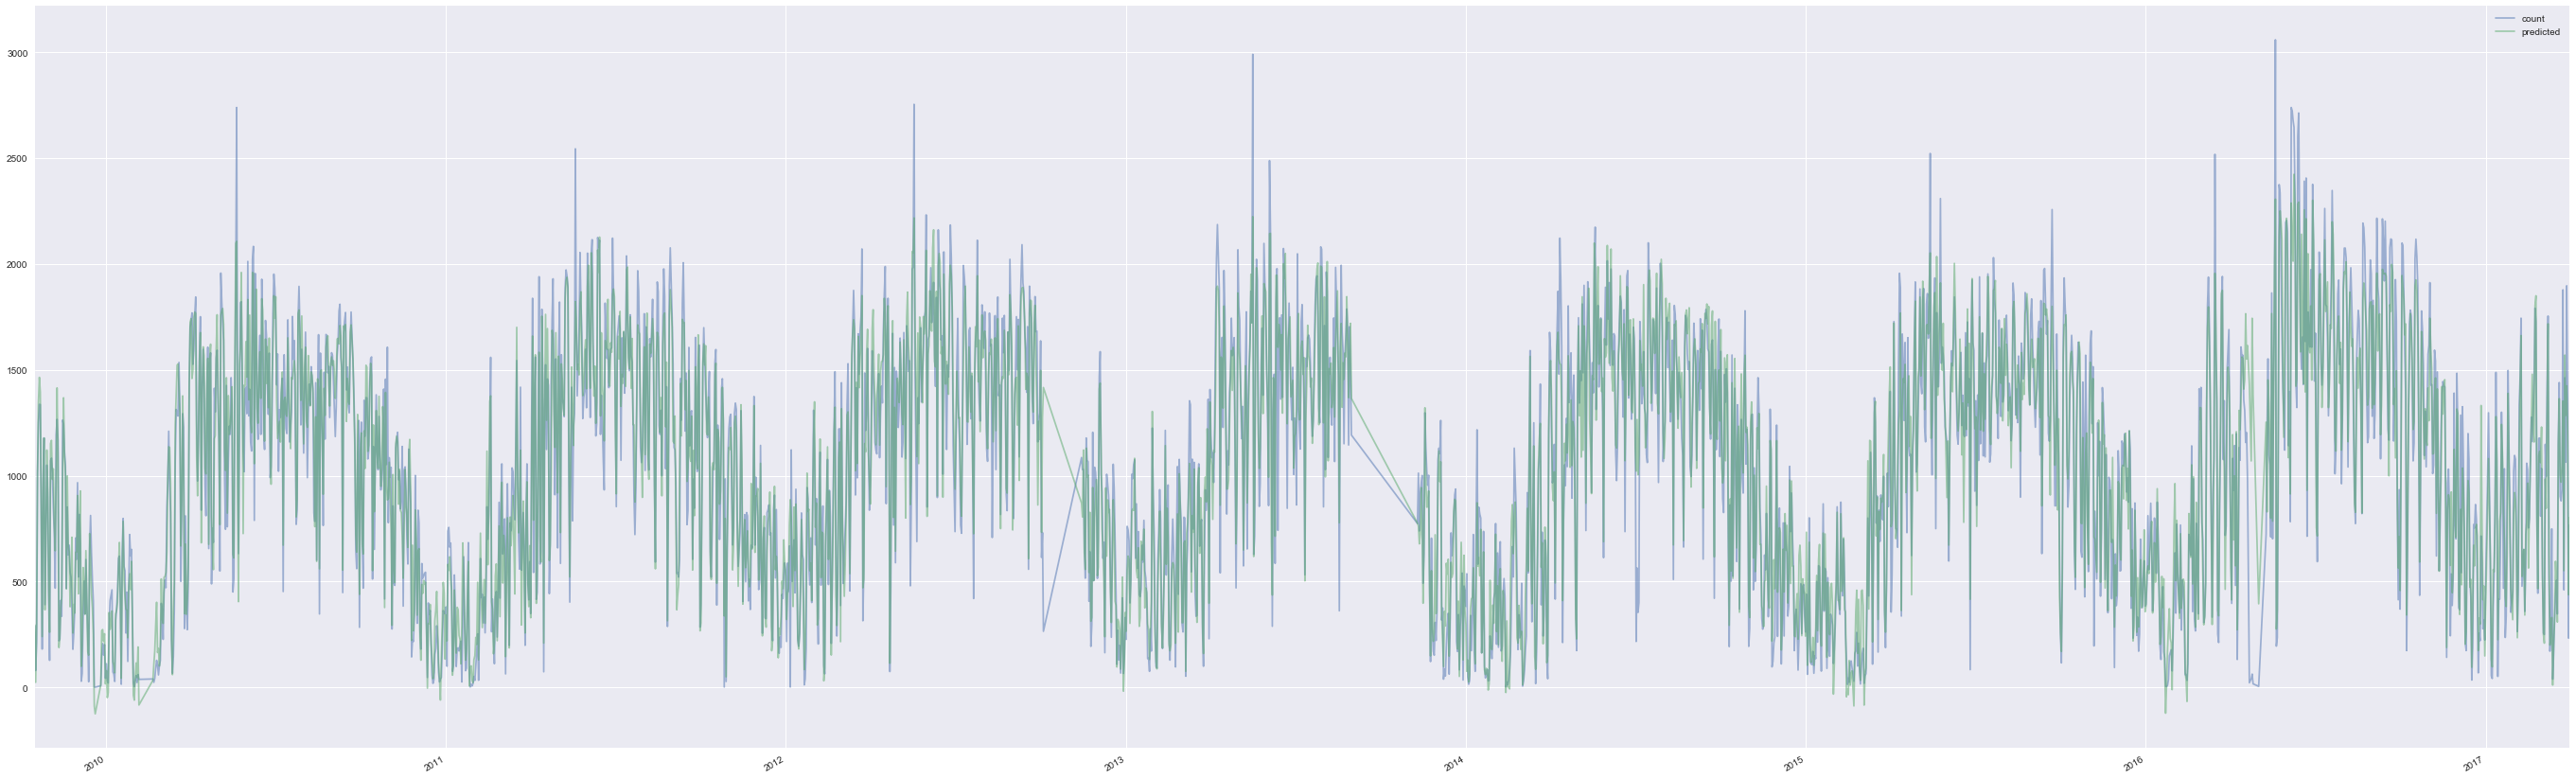

In [30]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns; sns.set()
bikedataframe['predicted'] = y_predit
bikedataframe[['count', 'predicted']].plot(figsize=(48,16),alpha=0.5)

In [31]:
bikedataframe.head()

,count,DAILYSnowfall,DAILYSnowDepth,CloudCover,Max Dew PointF,Max Gust SpeedMPH,Max Humidity,Max Sea Level PressureIn,Max TemperatureF,Max VisibilityMiles,...,sunrise_int,sunset_int,dayofweek,weekday,sunsethour,sunrisehour,day_hrs,holiday,snowtotal,predicted
2009-10-16,291.0,0.0,0.0,8.0,41.0,23.0,89.0,29.98,45.0,10.0,...,719.0,1828.0,4,1,18.466667,7.316667,11.150000,0.0,0.0,295.116837
2009-10-17,80.0,0.0,0.0,8.0,44.0,25.0,93.0,30.05,47.0,10.0,...,720.0,1827.0,5,0,18.450000,7.333333,11.116667,0.0,0.0,24.192180
2009-10-18,213.0,0.0,0.0,7.0,40.0,28.0,86.0,30.19,53.0,10.0,...,721.0,1825.0,6,0,18.416667,7.350000,11.066667,0.0,0.0,283.494478
2009-10-19,1012.0,0.0,0.0,0.0,40.0,25.0,83.0,30.30,59.0,10.0,...,722.0,1824.0,0,1,18.400000,7.366667,11.033333,0.0,0.0,1014.728927
2009-10-20,1251.0,0.0,0.0,3.0,49.0,13.0,83.0,30.27,70.0,10.0,...,723.0,1823.0,1,1,18.383333,7.383333,11.000000,0.0,0.0,1348.207401


In [32]:
forecast_data = {'date': ['2017-03-30'], 'temperature': [56.0], 'humidity': [10.0], 'windspeed': [10],
                 'precipitation': [0.13], 'weekday': [1], 'holiday': [0], 'day_hrs': [12.566667],
         'snow': [0], 'year' : [7.0], 'sunsethour': [19.5]}
df_forecast = pd.DataFrame.from_dict(forecast_data)
df_forecast['date'] = pd.to_datetime(df_forecast.date)
df_forecast = df_forecast.set_index("date")

